# ROC Curve and AuC 
<img src="https://machinelearningmastery.com/wp-content/uploads/2018/08/ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.png" height=50% width=50%>
Source ~ <a href="https://machinelearningmastery.com/wp-content/uploads/2018/08/ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.png">Image Source</a>

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

In [34]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.Age.isna().sum()

177

In [36]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'median')
imputed_age = si.fit_transform(df[['Age']])

In [37]:
df['imputed_age'] = imputed_age

In [38]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
imputed_age      0
dtype: int64

In [39]:
df[['female', 'male']] = pd.get_dummies(df.Sex)

In [40]:
df.loc[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,imputed_age,female,male
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,1,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,1,0


In [41]:
df.dropna(subset = ['Embarked'], inplace = True)

In [42]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
embarked_encoded = label.fit_transform(df[['Embarked']])
df['embarked_encoded'] = embarked_encoded

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
X = df[['Pclass', 'imputed_age', 'female', 'male', 'embarked_encoded']]
y = df.Survived
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [46]:
lr_y_pred = log_reg_model.predict(X_test)

In [47]:
lr_prob_y_pred = log_reg_model.predict_proba(X_test)

In [48]:
lr_prob_y_pred[1:3]

array([[0.39579703, 0.60420297],
       [0.89572358, 0.10427642]])

In [49]:
knn_prob_y_pred = knn_model.predict_proba(X_test)

In [50]:
# knn_prob_y_pred

In [51]:
from sklearn.metrics import roc_curve, auc

In [52]:
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr_prob_y_pred[:,1])
lr_auc = auc(lr_fpr, lr_tpr)

In [53]:
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn_prob_y_pred[:,1])
knn_auc = auc(knn_fpr, knn_tpr)

In [54]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [55]:
import matplotlib.pyplot as plt

[]

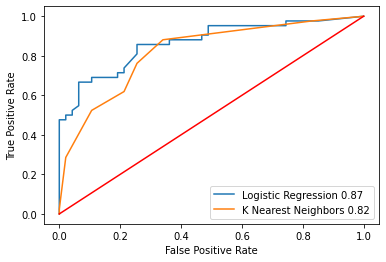

In [56]:
plt.figure()
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression %0.2f'%lr_auc)
plt.plot(knn_fpr, knn_tpr, label = 'K Nearest Neighbors %0.2f'%knn_auc)
plt.plot([0,1],[0,1], 'r-')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot()